可以直接使用python内置的math包进行实现，但是需要注意输入和输出都是单值，需要生成数组后才能使用

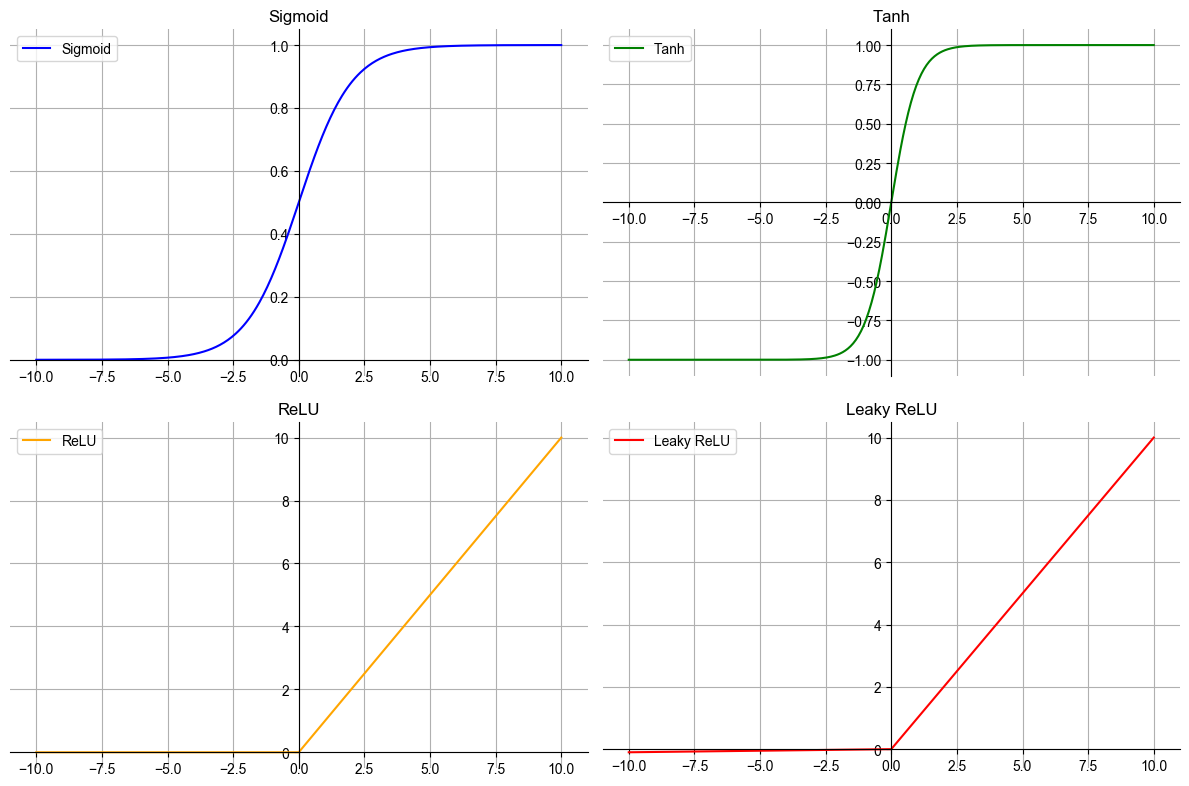

In [42]:
# 无 numpy 实现激活函数

import math
import matplotlib.pyplot as plt

# 激活函数（单个数值输入）
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def tanh(x):
    ex = math.exp(x)
    enx = math.exp(-x)
    return (ex - enx) / (ex + enx)

def relu(x):
    return x if x > 0 else 0

def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# 生成 x 值（-10 到 10 之间）
x_vals = [i * 0.05 for i in range(-200, 201)]  # 共 401 个点

# 分别计算各个激活函数对应的 y 值
y_funcs = {
    "Sigmoid": [sigmoid(x) for x in x_vals],
    "Tanh": [tanh(x) for x in x_vals],
    "ReLU": [relu(x) for x in x_vals],
    "Leaky ReLU": [leaky_relu(x) for x in x_vals]
}

# 绘图
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange', 'red']

for i, (name, y_vals) in enumerate(y_funcs.items(), start=1):
    ax = plt.subplot(2, 2, i)
    ax.plot(x_vals, y_vals, color=colors[i-1], label=name)
    ax.set_title(name)
    ax.grid(True)
    
    # 设置中心坐标轴
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


可以直接使用Numpy内置的函数即可轻松实现激活函数：

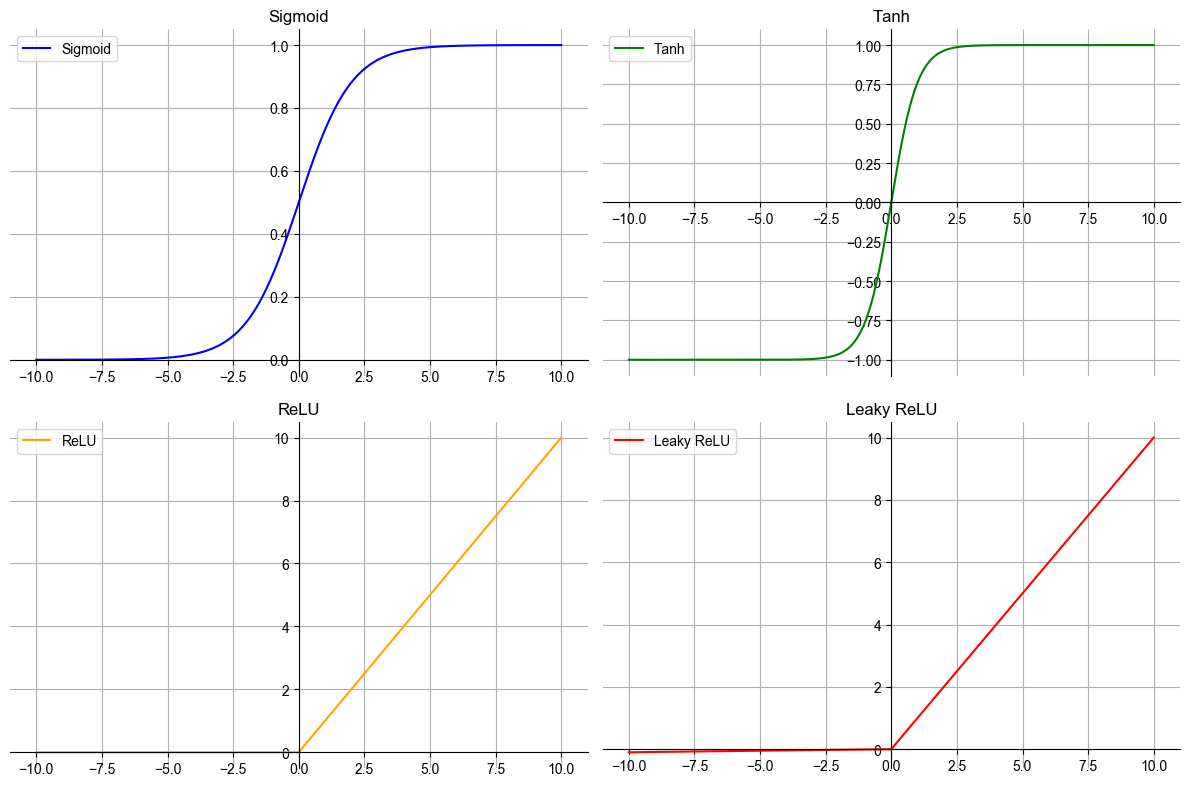

In [40]:
# numpy 实现激活函数

import numpy as np
import matplotlib.pyplot as plt

# 激活函数定义
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    # return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# 生成xy数据
x = np.linspace(-10, 10, 400)
y_funcs = {
    "Sigmoid": sigmoid(x),
    "Tanh": tanh(x),
    "ReLU": relu(x),
    "Leaky ReLU": leaky_relu(x)
}

# 绘图
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange', 'red']

for i, (name, y) in enumerate(y_funcs.items(), start=1):
    ax = plt.subplot(2, 2, i)
    ax.plot(x, y, color=colors[i-1], label=name)
    ax.set_title(name)
    ax.grid(True)
    
    # 中心坐标轴
    ax.spines['left'].set_position('zero')   # y轴移到x=0
    ax.spines['bottom'].set_position('zero') # x轴移到y=0
    ax.spines['right'].set_color('none')     # 隐藏右边框
    ax.spines['top'].set_color('none')       # 隐藏上边框
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

假设一个简单的神经网络，有 2 层（1 隐藏层），输入层有 3 个神经元，隐藏层有 4 个神经元，输出层有 2 个神经元。使用 NumPy 来实现：


===== 第1层计算 =====
加权和 z1 = [ 2.40521344 -1.56096801 -0.01925872 -2.34375213]
激活输出 a1 (ReLU) = [2.40521344 0.         0.         0.        ]

===== 第2层（输出层）计算 =====
加权和 z2 = [-2.98045774  3.6361207 ]
激活输出 a2 (Sigmoid) = [0.04831658 0.97432234]

=====🧠 神经网络结构: =====
输入层 (3个特征): [1 2 3]
↓
隐藏层 (4个神经元):
  神经元1: z=2.4052, a=ReLU(z)=2.4052
  神经元2: z=-1.5610, a=ReLU(z)=0.0000
  神经元3: z=-0.0193, a=ReLU(z)=0.0000
  神经元4: z=-2.3438, a=ReLU(z)=0.0000
↓
输出层 (2个神经元):
  输出1: z=-2.9805, a=Sigmoid(z)=0.0483
  输出2: z=3.6361, a=Sigmoid(z)=0.9743

===== 权重可视化 =====


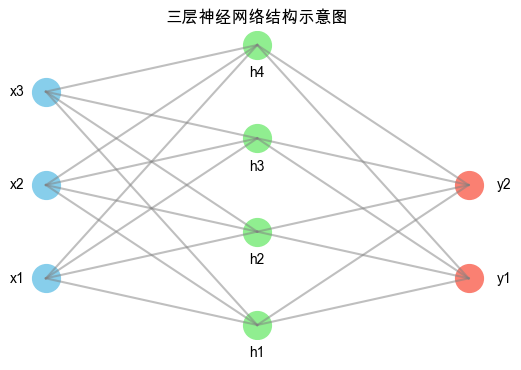

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 设置
plt.rcParams['font.family'] = 'Arial Unicode MS' # 设置字体，确保中文显示正常

# 设置 NumPy 随机种子，保证可重复
np.random.seed(42)

# 输入数据（3个特征）
X = np.array([1, 2, 3])

# 初始化权重和偏置
w1 = np.random.randn(4, 3)  # 第一层权重 (4个神经元 * 3个输入)
b1 = np.random.randn(4)     # 第一层偏置 (4个神经元)
w2 = np.random.randn(2, 4)  # 第二层权重 (2个神经元 * 4个隐藏层输出)
b2 = np.random.randn(2)     # 第二层偏置 (2个神经元)

# 激活函数：ReLU 和 Sigmoid
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# === 前向传播 ===
# 第一层：加权求和 + 激活
z1 = np.dot(w1, X) + b1 # z1 = w1 * X + b1
a1 = relu(z1) # a1 = ReLU(z1)

# 第二层（输出层）：加权求和 + 激活
z2 = np.dot(w2, a1) + b2 # z2 = w2 * a1 + b2
a2 = sigmoid(z2) # a2 = Sigmoid(z2)

# === 输出结构化信息 ===
print("\n===== 第1层计算 =====")
print("加权和 z1 =", z1)
print("激活输出 a1 (ReLU) =", a1)

print("\n===== 第2层（输出层）计算 =====")
print("加权和 z2 =", z2)
print("激活输出 a2 (Sigmoid) =", a2)

# 结构化模拟图
print("\n=====\U0001f9e0 神经网络结构: =====")
print("输入层 (3个特征):", X)
print("↓")
print("隐藏层 (4个神经元):")
for i, (z, a) in enumerate(zip(z1, a1)):
    print(f"  神经元{i+1}: z={z:.4f}, a=ReLU(z)={a:.4f}")
print("↓")
print("输出层 (2个神经元):")
for i, (z, a) in enumerate(zip(z2, a2)):
    print(f"  输出{i+1}: z={z:.4f}, a=Sigmoid(z)={a:.4f}")

# 可视化结构图

def draw_nn():
    _, ax = plt.subplots(figsize=(6, 4))

    # 输入层
    for i in range(3):
        ax.plot(0, i, 'o', markersize=20, color='skyblue')
        ax.text(-0.15, i, f'x{i+1}', ha='right', va='center')

    # 隐藏层
    for i in range(4):
        ax.plot(1.5, i - 0.5, 'o', markersize=20, color='lightgreen')
        ax.text(1.5, i - 0.8, f'h{i+1}', ha='center', va='center')

    # 输出层
    for i in range(2):
        ax.plot(3, i, 'o', markersize=20, color='salmon')
        ax.text(3.2, i, f'y{i+1}', ha='left', va='center')

    # 连接线
    for i in range(3):
        for j in range(4):
            ax.plot([0, 1.5], [i, j - 0.5], color='gray', alpha=0.5)
    for i in range(4):
        for j in range(2):
            ax.plot([1.5, 3], [i - 0.5, j], color='gray', alpha=0.5)

    ax.axis('off')
    plt.title("三层神经网络结构示意图")
    plt.show()

# 调用可视化函数
print("\n===== 权重可视化 =====")
draw_nn()


In [2]:
import torch
import torch.nn.functional as F

# 设置随机种子，确保可重复性
torch.manual_seed(42)

# 输入数据（示例10维）
X = torch.arange(10, dtype=torch.float32)

# 打印输入数据
print("输入数据 X:\n", X)

# 第一层权重和偏置
W1 = torch.randn(4, 10)   # 4个隐藏单元，输入10维
b1 = torch.randn(4)

# 打印W1和b1
print("第一层权重 W1:\n", W1)
print("第一层偏置 b1:\n", b1)

# 第二层权重和偏置
W2 = torch.randn(2, 4)    # 输出2维
b2 = torch.randn(2)

# 打印W2和b2
print("第二层权重 W2:\n", W2)
print("第二层偏置 b2:\n", b2)

# 隐藏层计算：线性变换 + ReLU 激活
z1 = torch.matmul(W1, X) + b1
a1 = F.relu(z1)

# 输出层计算：线性变换 + Sigmoid 激活
z2 = torch.matmul(W2, a1) + b2
a2 = torch.sigmoid(z2)

# === 输出结构化信息 ===
print("\n===== 第1层计算 =====")
print("加权和 z1 =", z1)
print("激活输出 a1 (ReLU) =", a1)

print("\n===== 第2层（输出层）计算 =====")
print("加权和 z2 =", z2)
print("激活输出 a2 (Sigmoid) =", a2)

# 结构化模拟图
print("\n===== 神经网络结构: =====")
print("输入层 (3个特征):", X)
print("↓")
print("隐藏层 (4个神经元):")
for i, (z, a) in enumerate(zip(z1, a1)):
    print(f"  神经元{i+1}: z={z:.4f}, a=ReLU(z)={a:.4f}")
print("↓")
print("输出层 (2个神经元):")
for i, (z, a) in enumerate(zip(z2, a2)):
    print(f"  输出{i+1}: z={z:.4f}, a=Sigmoid(z)={a:.4f}")

输入数据 X:
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
第一层权重 W1:
 tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047,
         -0.7521,  1.6487],
        [-0.3925, -1.4036, -0.7279, -0.5594, -0.7688,  0.7624,  1.6423, -0.1596,
         -0.4974,  0.4396],
        [-0.7581,  1.0783,  0.8008,  1.6806,  0.0349,  0.3211,  1.5736, -0.8455,
          1.3123,  0.6872],
        [-1.0892, -0.3553, -1.4181,  0.8963,  0.0499,  2.2667,  1.1790, -0.4345,
         -1.3864, -1.2862]])
第一层偏置 b1:
 tensor([-0.0499,  0.5263, -0.0085,  0.7291])
第二层权重 W2:
 tensor([[ 0.1331,  0.8640, -1.0157, -0.8887],
        [ 0.1498, -0.2089, -0.3870,  0.9912]])
第二层偏置 b2:
 tensor([ 0.4679, -0.2049])

===== 第1层计算 =====
加权和 z1 = tensor([-9.2065,  5.4394, 29.6647, -6.8747])
激活输出 a1 (ReLU) = tensor([ 0.0000,  5.4394, 29.6647,  0.0000])

===== 第2层（输出层）计算 =====
加权和 z2 = tensor([-24.9622, -12.8220])
激活输出 a2 (Sigmoid) = tensor([1.4422e-11, 2.7006e-06])

===== 神经网络结构: =====
输入层 (3个特征): tensor([0., 1

In [ ]:
import torch.nn as nn
from collections import OrderedDict


model = nn.Sequential(
    nn.Linear(4, 8),     # 输入层到隐藏层
    nn.ReLU(), # ReLU 激活函数
    nn.Linear(8, 1),     # 隐藏层到输出层
    nn.Sigmoid() # Sigmoid 激活函数
)

model_complex = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(4, 8)),
    ('relu', nn.ReLU()),
    ('fc2', nn.Linear(8, 1)),
    ('sigmoid', nn.Sigmoid())
]))

# 模型输出
print("\n===== 模型输出 =====")
print("模型结构:", model)
print("复杂模型结构:", model_complex)

output = model(torch.randn(1, 4))  # 输入一个随机向量
output_complex = model_complex(torch.randn(1, 4))  # 输入一个随机向量


print("\n模型输出:", output)
print("\n复杂模型输出:", output_complex)


模型输出: tensor([[0.5264]], grad_fn=<SigmoidBackward0>)

复杂模型输出: tensor([[0.4477]], grad_fn=<SigmoidBackward0>)


## 练习：模仿上述代码再实现一个简单的两层前向传播神经网络

请根据下列公式实现一个神经网络的前向传播过程。



### **网络结构说明：**
该网络是一个只包含一个隐藏层的前馈神经网络（Feedforward Neural Network），结构简单但足以展示前向传播的基本流程，包括线性变换、激活函数处理和输出预测等关键步骤。

- 输入向量：$ x \in \mathbb{R}^n $
- 第一层权重：$ W_1 \in \mathbb{R}^{h \times n} $，偏置：$ b_1 \in \mathbb{R}^h $
- 第二层权重：$ W_2 \in \mathbb{R}^{m \times h} $，偏置：$ b_2 \in \mathbb{R}^m $
- 激活函数：
  - 第一层使用 **ReLU**
  - 输出层使用 **Sigmoid**

**注意**：在实现前向传播时，必须确保前一层输出的维度与后一层权重矩阵的输入维度匹配，否则将导致矩阵乘法报错。建议在每一层操作前先确认维度一致性。

### **前向传播公式：**

第 1 层（隐藏层）：
$$
z_1 = W_1 x + b_1
$$
$$
a_1 = \text{ReLU}(z_1)
$$

第 2 层（输出层）：
$$
z_2 = W_2 a_1 + b_2
$$
$$
a_2 = \sigma(z_2)
$$


激活函数定义：

$$ \text{ReLU}(z) = \max(0, z) $$
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$


请在下方代码单元中不全关键的信息（完成激活函数、给出初始权重和偏置的维度以及前向传播计算公式），计算并输出最终结果 $ a_2 $。

In [ ]:
# 📝 练习：请再实现一个简单的神经网络前向传播
# 输入：X，权重W1、偏置b1，权重W2、偏置b2
# 激活函数：ReLU（隐藏层），Sigmoid（输出层）
# 输出：模型的最终预测 a2

import numpy as np
np.random.seed(42)

# 提示：隐藏层输出 a1 = relu(W1 * X + b1)
#      输出层输出 a2 = sigmoid(W2 * a1 + b2)
# 注意：输入数据 X 形状为 (10,)，权重 W1、W2 和偏置 b1、b2 的维度需要根据实际情况调整。

# 激活函数定义（可直接使用）
def relu(x):
    # 请在下方填写你的代码👇, 提示：relu函数表达式为 if x > 0 then x else 0 
    pass

def sigmoid(x):
    # 请在下方填写你的代码👇, 提示：sigmoid函数为  1 / (1 + exp(-x))
    pass

# 输入数据
X = np.array(range(10)) # 形状：(10,)

# 初始化权重和偏置, 提示：请根据实际情况修改权重和偏置的维度，规则为矩阵乘法的维度匹配
W1_dim = None # 请修改第一层权重的维度，例如 (4, 3)
b1_dim = None # 请修改第一层偏置的维度，例如 (4,)
W2_dim = None # 请修改第二层权重的维度，例如 (2, 4)
b2_dim = None # 请修改第二层偏置的维度，例如 (2,)

W1 = np.random.randn(*W1_dim)
b1 = np.random.randn(*b1_dim)
W2 = np.random.randn(*W2_dim)
b2 = np.random.randn(*b2_dim)

# ======= 请在这里实现前向传播计算，填充变量 a2 =======
# 第一层：加权求和 + 激活，要求使用 ReLU 激活函数
# 第二层（输出层）：加权求和 + 激活，要求使用 Sigmoid 激活函数
# 请在下方完善a1和a2的表达式👇
a1 = None
a2 = None

# ========================================================
assert a2.shape == (2,), "输出层的预测结果 a2 形状应为 (2,)"
assert np.all(np.isfinite(a2)), "输出结果 a2 中包含非有限值，请检查计算过程"
assert np.all(a2 >= 0) and np.all(a2 <= 1), "输出结果 a2 应在 [0, 1] 范围内"
assert np.allclose(a2, [4.47298023e-14, 9.99498849e-01]), "输出结果 a2 应与预期结果接近"
print("恭喜你，前向传播计算正确！")